
# **#TEXT CLASSIFICATION **


**EDA**

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [22]:
df.shape

(2000, 2)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [24]:
df.isnull().sum()

,0
Data,0
Labels,0


In [25]:
df.Labels.unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [26]:
df['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
comp.os.ms-windows.misc,100
comp.sys.ibm.pc.hardware,100
comp.sys.mac.hardware,100
comp.windows.x,100
misc.forsale,100
rec.autos,100
rec.motorcycles,100


In [27]:
# Text Preprocessing

**Text** **Preprocessing**

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Split the text
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a string
    return ' '.join(tokens)

# Apply the preprocessing function to the 'Data' column
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

# Display the first few rows of the cleaned data
print(df[['Data', 'Cleaned_Data']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


#  Sentiment **Analysis**

In [29]:
from textblob import TextBlob
import pandas as pd




# Function to get sentiment
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply function to the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Display results
print(df)


                                                   Data              Labels  \
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism   
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism   
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism   
...                                                 ...                 ...   
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc   
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc   
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc   

                                           Cleaned_

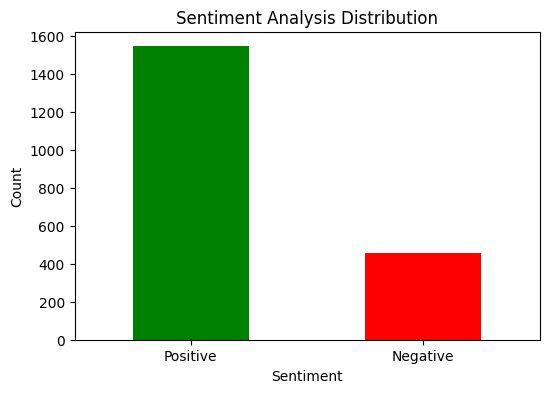

In [30]:
import matplotlib.pyplot as plt

# Count sentiment categories
sentiment_counts = df['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Distribution")
plt.xticks(rotation=0)
plt.show()


# **Naive Bayes Model for Text Classification**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Data'])

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

   0400   10  100        11   12   13   14   15   16        17  ...  \
0   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
1   0.0  0.0  0.0  0.121553  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
2   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.083327  ...   
3   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
4   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...   

   xnewsreader      xref      year     years       yes       yet  york  young  \
0      0.00000  0.000000  0.000000  0.000000  0.044618  0.000000   0.0    0.0   
1      0.14061  0.000000  0.000000  0.000000  0.000000  0.000000   0.0    0.0   
2      0.00000  0.000000  0.000000  0.000000  0.000000  0.087660   0.0    0.0   
3      0.00000  0.000000  0.019064  0.017232  0.123677  0.020022   0.0    0.0   
4      0.00000  0.037403  0.000000  0.051536  0.000000  0.000000   0.0    0.0   

      youre     youve  
0  0.000000  0.056495  
1  0.000000  0.000000  
2  0.087335  0

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix,  # Features (TF-IDF matrix)
    df['Labels'],  # Labels (categories)
    test_size=0.2,
    random_state=42
)

# Check the shape of the training and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1600, 1000)
Test set shape: (400, 1000)


In [33]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [34]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Display the first few predictions
print("Predictions:", y_pred[:10])
print("Actual labels:", y_test[:10].values)

Predictions: ['talk.politics.misc' 'comp.sys.ibm.pc.hardware' 'alt.atheism'
 'rec.sport.baseball' 'sci.electronics' 'sci.electronics'
 'rec.sport.baseball' 'talk.politics.mideast' 'alt.atheism' 'alt.atheism']
Actual labels: ['talk.politics.misc' 'comp.sys.ibm.pc.hardware' 'sci.med'
 'rec.sport.baseball' 'sci.electronics' 'sci.electronics'
 'rec.sport.baseball' 'talk.politics.mideast' 'alt.atheism' 'sci.med']


# **Evaluation**

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.73
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.48      0.78      0.60        18
           comp.graphics       0.52      0.72      0.60        18
 comp.os.ms-windows.misc       0.77      0.77      0.77        22
comp.sys.ibm.pc.hardware       0.79      0.60      0.68        25
   comp.sys.mac.hardware       0.68      0.71      0.70        21
          comp.windows.x       0.83      0.80      0.82        25
            misc.forsale       0.75      0.67      0.71        18
               rec.autos       0.75      1.00      0.86        18
         rec.motorcycles       0.59      0.81      0.68        16
      rec.sport.baseball       0.85      0.94      0.89        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.85      0.89      0.87        19
         sci.electronics       0.53      0.50      0.52        16
                 sci.med       0.81  